## Routine processing result 2 - displacement time-series ##
+ Figure 7 - Displacement time-series map of Fernandina island with Sentinel-1 data

In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt, ticker
import matplotlib as mpl
from mintpy.defaults.plot import *
from mintpy.utils import ptime, readfile, utils as ut, plot as pp
from mintpy.objects import timeseries
from mintpy import view

work_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/mintpy/geo')
os.chdir(work_dir)
print('Go to directory: '+work_dir)

ts_file = 'geo_timeseries_ECMWF_ramp_demErr.h5'
vel_file = 'geo_velocity.h5'
dem_file = 'dem.h5'
mask_file = 'maskTempCohFernandina.h5'

geo_box = (-91.670, -0.255, -91.370, -0.515)    # W, N, E, S
proj_name = 'FernandinaSenDT128'

atr = readfile.read_attribute(ts_file)
coord = ut.coordinate(atr)
pix_box = coord.box_geo2pixel(geo_box)

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/mintpy/geo


In [2]:
## Fig.7 - call view.py to plot
cmd = 'view.py {} -m {} '.format(ts_file, mask_file)
cmd += ' --sub-lon {w} {e} --sub-lat {s} {n} '.format(w=geo_box[0], n=geo_box[1],
                                                      e=geo_box[2], s=geo_box[3])
cmd += ' --wrap --wrap-range -10 10 '
cmd += ' --ncols 10 --nrows 10 --figsize 8 9 --fontsize 8 --notick --nocbar --dpi 600 --no-tight-layout '
cmd += ' --noaxis  --nodisplay  -o {}_TS.png'.format(proj_name)
!{cmd}


******************** Display ********************
input file is timeseries file: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE/geo_timeseries_ECMWF_ramp_demErr.h5 in float32 format
file size in y/x: (2000, 1700)
num of datasets in file geo_timeseries_ECMWF_ramp_demErr.h5: 98
datasets to exclude (0):
[]
datasets to display (98):
['timeseries-20141213', 'timeseries-20141225', 'timeseries-20150307', 'timeseries-20150319', 'timeseries-20150331', 'timeseries-20150412', 'timeseries-20150424', 'timeseries-20150506', 'timeseries-20150518', 'timeseries-20150530', 'timeseries-20150611', 'timeseries-20150623', 'timeseries-20150717', 'timeseries-20150729', 'timeseries-20150822', 'timeseries-20150903', 'timeseries-20150915', 'timeseries-20150927', 'timeseries-20151009', 'timeseries-20151021', 'timeseries-20151102', 'timeseries-20151114', 'timeseries-20151126', 'timeseries-20151208', 'timeseries-20151220', 'timeseries-20160101', 'timeseries-20160113', 'timeseries-20160125', 'tim

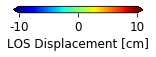

In [7]:
# Fig.7 - colorbar
fig = plt.figure(figsize=(2, 0.1))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])
cbar = mpl.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('jet'), orientation='horizontal', ticks=[0, 0.5, 1], extend='both')
cbar.ax.set_xticklabels(['-10', '0', '10'])
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('LOS Displacement [cm]', fontsize=font_size)

#plt.savefig('{}_TS_cbar.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

y/x: 878/414
open timeseries file: geo_timeseries_ECMWF_ramp_demErr.h5


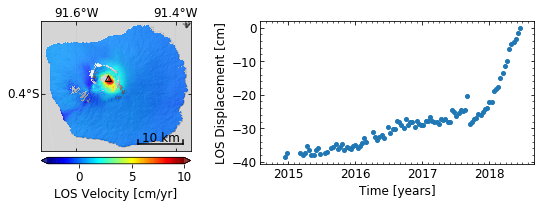

In [4]:
# Backup - Plot Velocity with POI displacement timeseries

# read ts data
lat, lon = -0.3680, -91.5355
y, x = coord.geo2radar(lat, lon)[0:2]
print('y/x: {}/{}'.format(y, x))
d_ts = np.squeeze(readfile.read(ts_file, box=(x, y, x+1, y+1))[0]) * 100.
obj = timeseries(ts_file)
obj.open()
dates = ptime.date_list2vector(obj.dateList)[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 3])

# read vel data
cmd = 'view.py {} velocity --mask {} '.format(vel_file, mask_file)
cmd += ' --sub-lon {w} {e} --sub-lat {s} {n} '.format(w=geo_box[0], n=geo_box[1], e=geo_box[2], s=geo_box[3])
cmd += ' -c jet -v -3 10 --cbar-loc bottom --cbar-nbins 3 --cbar-ext both --cbar-size 5% '
cmd += ' --dem {} --dem-nocontour '.format(dem_file)
cmd += ' --lalo-step 0.2 --lalo-loc 1 0 1 0 --scalebar 0.3 0.80 0.05 --notitle --fontsize 12 '
cmd += ' --noverbose'
d_v, atr ,inps = view.prep_slice(cmd)
ax[0], inps, im, cbar = view.plot_slice(ax[0], d_v, atr, inps)

ax[0].plot(lon, lat, "k^", mfc='none', mew=1., ms=6)  #point of interest
cbar.set_label("LOS Velocity [cm/yr]", fontsize=font_size)


ax[1].scatter(dates, d_ts, marker='o', s=4**2) #, color='k')
pp.auto_adjust_xaxis_date(ax[1], obj.yearList, fontsize=font_size)
ax[1].set_xlabel('Time [years]', fontsize=font_size)
ax[1].set_ylabel('LOS Displacement [cm]', fontsize=font_size)
ax[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax[1].tick_params(which='both', direction='in', labelsize=font_size,
                  bottom=True, top=True, left=True, right=True)

fig.subplots_adjust(wspace=-0.4)
fig.tight_layout()
#plt.savefig('{}_POI.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()